In [14]:
from patho import Model, UNET_VGG, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [15]:
net = UNET_VGG()
net.make_parallel()

RuntimeError: CUDA error: out of memory

In [12]:
data_loader = DataLoader("patho/data/crc", "images",
                         "masks", batch_size=3, output_size=572).getInstance()

In [13]:
model = Model(net, lr=5e-6, with_jaccard=True)
model.train(data_loader, EPOCH=25)

RuntimeError: CUDA error: out of memory

In [20]:
for imgs, masks in data_loader:
    predicted_masks = model.net(imgs.cuda()).cpu().detach().numpy()
    imgs, masks = imgs.cpu().detach().numpy(), masks.cpu().detach().numpy()
    break
    
print(imgs.shape, masks.shape)
print(np.min(predicted_masks[0]), np.max(predicted_masks[0]))
print(np.min(masks[0]), np.max(masks[0]))

(3, 3, 572, 572) (3, 1, 388, 388)
0.2422087 0.9945543
0.0 1.0


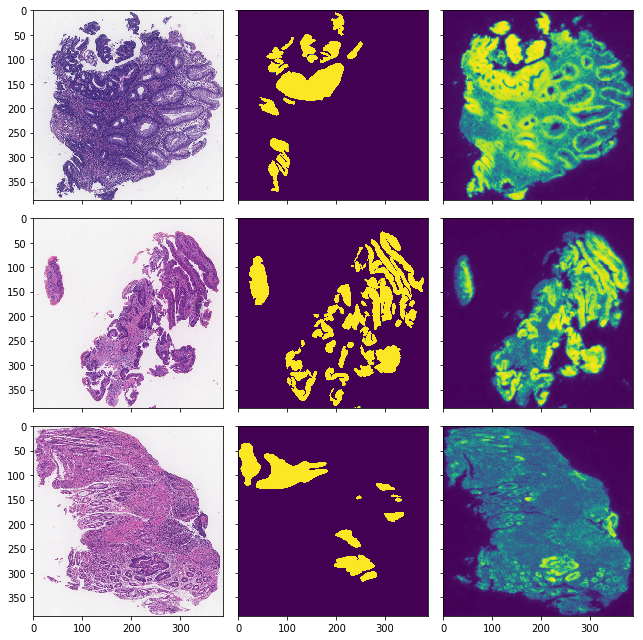

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

for ind, ax in enumerate(axes.flatten(), 0):
    if ind % 3 == 0:
        ax.imshow(imgs[ind // 3].transpose((1, 2, 0))[92:572-92, 92:572-92])
    elif ind % 3 == 1:
        ax.imshow(masks[ind // 3].transpose((1, 2, 0)).reshape(388, 388))
    else:
        ax.imshow(predicted_masks[ind // 3].transpose((1, 2, 0)).reshape(388, 388))

fig.tight_layout()
plt.show()

In [22]:
predicted_masks[predicted_masks >= 0.75] = 1.
predicted_masks[predicted_masks < 0.75] = 0.

3.380542744817156e-05
3.68315487536765e-05
0.000120407763713874


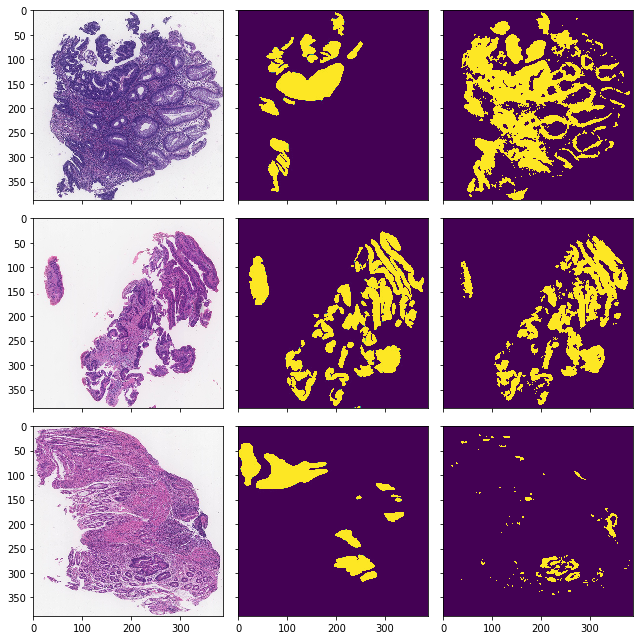

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

for ind, ax in enumerate(axes.flatten(), 0):
    if ind % 3 == 0:
        ax.imshow(imgs[ind // 3].transpose((1, 2, 0))[92:572-92, 92:572-92])
    elif ind % 3 == 1:
        ax.imshow(masks[ind // 3].transpose((1, 2, 0)).reshape(388, 388))
    else:
        dice = 2 * np.sum(np.intersect1d(masks[ind // 3].ravel(), predicted_masks[ind // 3].ravel())) / (np.sum(masks[ind // 3]) + np.sum(predicted_masks[ind // 3]))
        print(dice)
        ax.imshow(predicted_masks[ind // 3].transpose((1, 2, 0)).reshape(388, 388))

fig.tight_layout()
plt.show()